In [1]:
#import des librairies l'environnement
import pandas as pd
import numpy as np
import sklearn.metrics as sm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\friti\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('twitter_training.csv', header=0 ,delimiter=',')


In [3]:
import pandas as pd

# Supposons que 'df' soit votre DataFrame initial
# Remplacez 'df' par le nom de votre DataFrame
df.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweet Content']

# Vous pouvez également utiliser la méthode rename si vous voulez renommer seulement certaines colonnes
# df.rename(columns={'2401': 'Tweet ID', 'Borderlands': 'Entity', 'Positive': 'Sentiment', 'im getting on borderlands and i will murder you all ,': 'Tweet Content'}, inplace=True)

# Affichez le DataFrame avec les nouveaux noms de colonnes
print(df)


       Tweet ID       Entity Sentiment  \
0          2401  Borderlands  Positive   
1          2401  Borderlands  Positive   
2          2401  Borderlands  Positive   
3          2401  Borderlands  Positive   
4          2401  Borderlands  Positive   
...         ...          ...       ...   
74676      9200       Nvidia  Positive   
74677      9200       Nvidia  Positive   
74678      9200       Nvidia  Positive   
74679      9200       Nvidia  Positive   
74680      9200       Nvidia  Positive   

                                           Tweet Content  
0      I am coming to the borders and I will kill you...  
1      im getting on borderlands and i will kill you ...  
2      im coming on borderlands and i will murder you...  
3      im getting on borderlands 2 and i will murder ...  
4      im getting into borderlands and i can murder y...  
...                                                  ...  
74676  Just realized that the Windows partition of my...  
74677  Just realized th

In [4]:
df = df[df['Sentiment'] != 'Irrelevant']


In [5]:
df

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
# Convertir toutes les valeurs de la colonne 'Tweet Content' en chaînes de caractères
df['Tweet Content'] = df['Tweet Content'].astype(str)

In [131]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Télécharger les stopwords de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Charger les stopwords
stop_words = set(stopwords.words('english'))

# Fonction de prétraitement des textes
def preprocess_text(text):
    # Tokenization
    words = word_tokenize(text)
    # Suppression des stopwords
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Appliquer le prétraitement aux textes
df['Processed Text'] = df['Tweet Content'].apply(preprocess_text)
df_sample = df.sample(n=40000, random_state=42)  # Ajustez la taille de l'échantillon selon vos besoins

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    df_sample['Processed Text'],
    df_sample['Sentiment'],
    test_size=0.2,
    random_state=42
)

# Vectorisation des textes
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Entraîner un modèle Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)

# Prédire sur l'ensemble de test
y_pred = nb_model.predict(X_test_vectorized)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\friti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\friti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.761
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.83      0.78      2896
     Neutral       0.81      0.63      0.71      2376
    Positive       0.75      0.80      0.77      2728

    accuracy                           0.76      8000
   macro avg       0.77      0.75      0.76      8000
weighted avg       0.77      0.76      0.76      8000



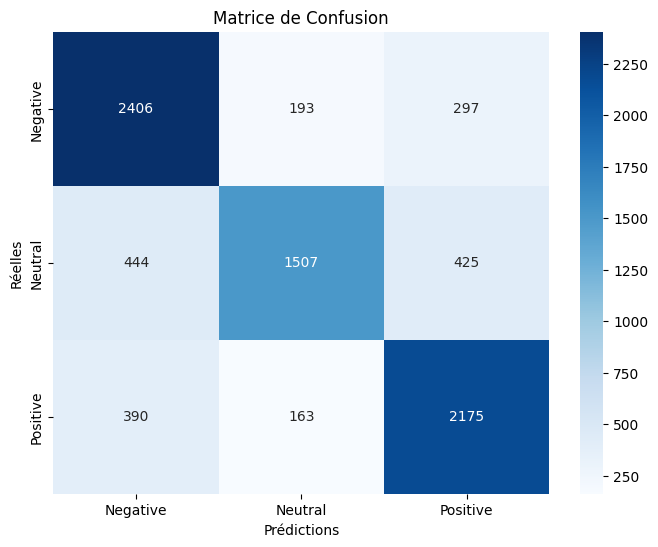

In [132]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test, y_pred)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


## KNN Model


In [9]:
from sklearn.neighbors import KNeighborsClassifier


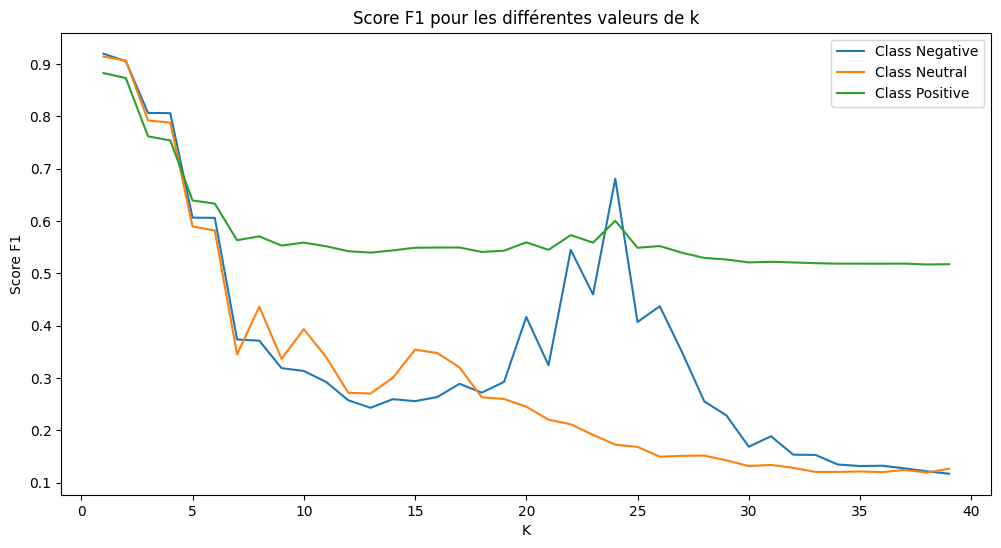

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Charger votre dataset
# (Assurez-vous d'avoir déjà appliqué le prétraitement des textes)
# Vous pouvez également utiliser df_sample à la place de df si vous préférez travailler avec l'échantillon

# Diviser les données en ensembles d'entraînement et de test
df_sample = df.sample(n=40000, random_state=42)  # Ajustez la taille de l'échantillon selon vos besoins
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    df_sample['Processed Text'],
    df_sample['Sentiment'],
    test_size=0.2,
    random_state=42
)

# Utiliser TF-IDF pour vectoriser les textes
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_sample)
X_test_tfidf = tfidf_vectorizer.transform(X_test_sample)

# Initialiser une liste pour stocker les scores F1
f1_scores = { 'Negative': [], 'Neutral': [], 'Positive': []}

# Calculer le F1 Score pour k entre 1 et 40
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_tfidf, y_train_sample)
    pred_i = knn_model.predict(X_test_tfidf)
    
    # Calculer le F1 Score pour chaque classe et l'ajouter à la liste
    f1 = f1_score(y_test_sample, pred_i, labels=['Negative', 'Neutral', 'Positive'], average=None)
    for j, label in enumerate([ 'Negative', 'Neutral', 'Positive']):
        f1_scores[label].append(f1[j])

# Tracer le graphique avec les scores F1
plt.figure(figsize=(12, 6))
for label, scores in f1_scores.items():
    plt.plot(range(1, 40), scores, label=f'Class {label}')

plt.title('Score F1 pour les différentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Score F1')
plt.legend()
plt.show()


In [134]:
best_k_index = mean_f1_scores.index(max(mean_f1_scores))
best_k = k_values[best_k_index]

print(f"Meilleure valeur de k : {best_k}")

Meilleure valeur de k : 1


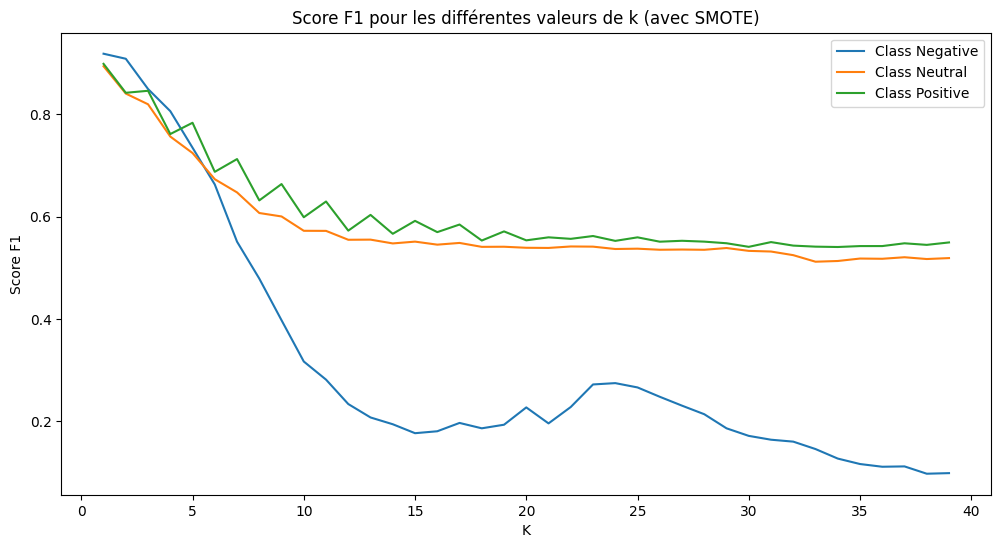

In [11]:
from imblearn.over_sampling import SMOTE

# ...

# Utiliser TF-IDF pour vectoriser les textes
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_sample)
X_test_tfidf = tfidf_vectorizer.transform(X_test_sample)

# Appliquer SMOTE sur l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train_sample)

# Initialiser une liste pour stocker les scores F1
f1_scores = { 'Negative': [], 'Neutral': [], 'Positive': []}

# Calculer le F1 Score pour k entre 1 et 40
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_resampled, y_train_resampled)
    pred_i = knn_model.predict(X_test_tfidf)
    
    # Calculer le F1 Score pour chaque classe et l'ajouter à la liste
    f1 = f1_score(y_test_sample, pred_i, labels=['Negative', 'Neutral', 'Positive'], average=None)
    for j, label in enumerate([ 'Negative', 'Neutral', 'Positive']):
        f1_scores[label].append(f1[j])

# Tracer le graphique avec les scores F1
plt.figure(figsize=(12, 6))
for label, scores in f1_scores.items():
    plt.plot(range(1, 40), scores, label=f'Class {label}')

plt.title('Score F1 pour les différentes valeurs de k (avec SMOTE)')
plt.xlabel('K')
plt.ylabel('Score F1')
plt.legend()
plt.show()


C:\Users\friti\AppData\Local\Temp\ipykernel_16660\2092811489.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_sample['Sentiment'],palette='Set3')


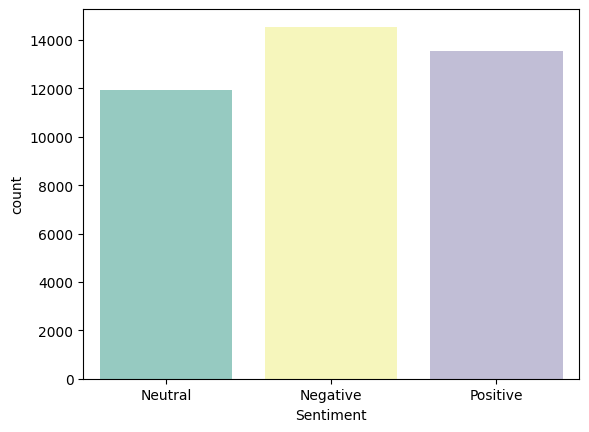

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(x=df_sample['Sentiment'],palette='Set3')
#sns.countplot(y=dt['AGE'])
plt.show()

### Data unbalanced

In [13]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_tfidf, y_train_sample)

C:\Users\friti\AppData\Local\Temp\ipykernel_16660\765105216.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_sample,palette='Set3')


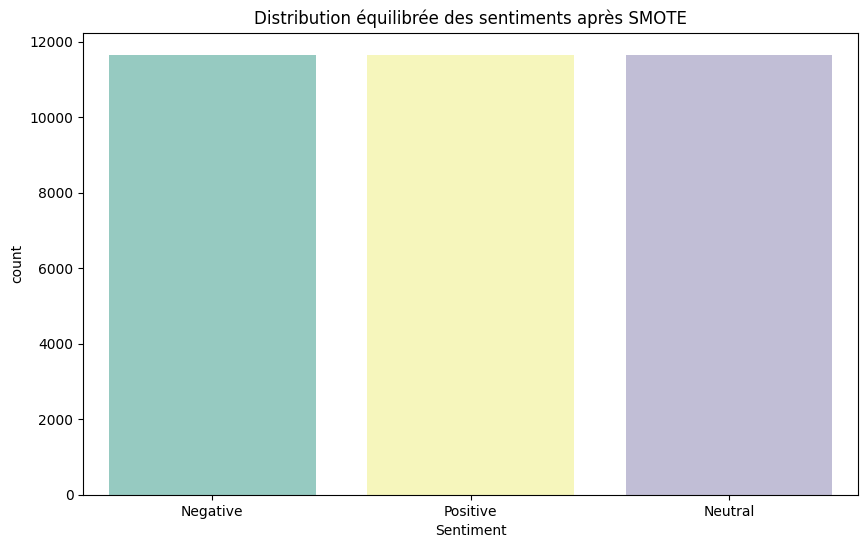

In [14]:
smote = SMOTE(random_state=42)

# Convertir la représentation TF-IDF en DataFrame pour la visualisation
df_sample = pd.DataFrame(X_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_sample['Sentiment'] = y_train

# Visualiser la distribution des sentiments équilibrés
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df_sample,palette='Set3')
plt.title('Distribution équilibrée des sentiments après SMOTE')
plt.show()

### Data balanced

In [65]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


# Vectorisation des textes
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_sample)
X_test_vectorized = vectorizer.transform(X_test_sample)

# Entraîner un modèle Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train_sample)

# Prédire sur l'ensemble de test
y_pred = nb_model.predict(X_test_vectorized)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test_sample, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test_sample, y_pred))


Accuracy: 0.761
Classification Report:
               precision    recall  f1-score   support

    Negative       0.74      0.83      0.78      2896
     Neutral       0.81      0.63      0.71      2376
    Positive       0.75      0.80      0.77      2728

    accuracy                           0.76      8000
   macro avg       0.77      0.75      0.76      8000
weighted avg       0.77      0.76      0.76      8000



### Précision (Precision) :

La précision mesure la proportion d'instances positives parmi les instances prédites comme positives.
### Rappel (Recall) :
Le rappel mesure la proportion d'instances positives correctement prédites parmi toutes les instances réellement positives.
###  F1-score
est une moyenne pondérée de la précision et du rappel, fournissant une mesure globale de la performance d'un modèle.Il est calculé à l'aide de la formule 
### Le support 
représente le nombre d'instances réelles de chaque classe dans l'ensemble de test.
### Accuracy
est la proportion d'instances correctement classées parmi l'ensemble des instances.


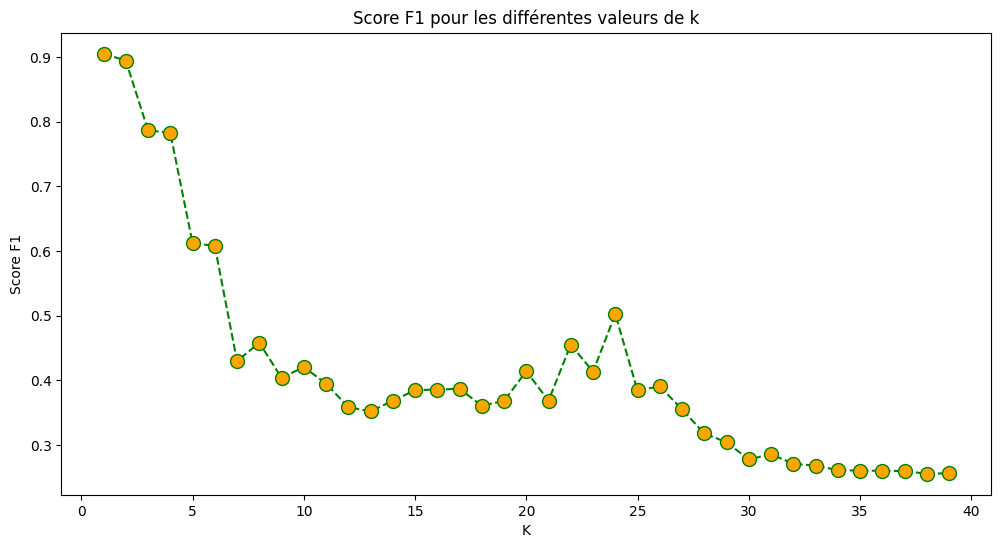

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Charger votre dataset
# (Assurez-vous d'avoir déjà appliqué le prétraitement des textes)
# Vous pouvez également utiliser df_sample à la place de df si vous préférez travailler avec l'échantillon

# Diviser les données en ensembles d'entraînement et de test

# Utiliser TF-IDF pour vectoriser les textes
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_sample)
X_test_tfidf = tfidf_vectorizer.transform(X_test_sample)

# Initialiser une liste pour stocker les scores F1
f1_scores = []

# Calculer le F1 Score pour k entre 1 et 40
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train_tfidf, y_train_sample)
    pred_i = knn_model.predict(X_test_tfidf)
    
    # Calculer le F1 Score pour chaque classe
    f1 = f1_score(y_test_sample, pred_i, average='weighted')
    f1_scores.append(f1)

# Tracer le graphique avec les scores F1
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), f1_scores, color='green', linestyle='dashed', marker='o', markerfacecolor='orange', markersize=10)
plt.title('Score F1 pour les différentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Score F1')
plt.show()


In [135]:
best_k_index = mean_f1_scores.index(max(mean_f1_scores))
best_k = k_values[best_k_index]

print(f"Meilleure valeur de k : {best_k}")

Meilleure valeur de k : 1


In [16]:
print(df_sample.groupby('Sentiment').size())


Sentiment
Negative    11652
Neutral     11652
Positive    11652
dtype: int64


In [18]:
y_test_sample

13773    Negative
4276     Negative
21331    Positive
74277    Positive
52518    Positive
           ...   
71601     Neutral
54452    Negative
64446    Negative
5703     Positive
59907     Neutral
Name: Sentiment, Length: 8000, dtype: object

In [19]:
knn = KNeighborsClassifier(1)
knn_model = knn.fit(X_train_tfidf, y_train_sample)
y_pred_knn =knn_model.predict(X_test_tfidf)



In [136]:
accuracy_knn = accuracy_score(y_test_sample, y_pred_knn)
classification_report_knn = classification_report(y_test_sample, y_pred_knn)

# Afficher les résultats
print(f'Accuracy: {accuracy_knn:.4f}')
print('Classification Report:\n', classification_report_knn)

Accuracy: 0.9042
Classification Report:
               precision    recall  f1-score   support

    Negative       0.96      0.88      0.92      2896
     Neutral       0.96      0.87      0.91      2376
    Positive       0.82      0.96      0.88      2728

    accuracy                           0.90      8000
   macro avg       0.91      0.90      0.91      8000
weighted avg       0.91      0.90      0.91      8000



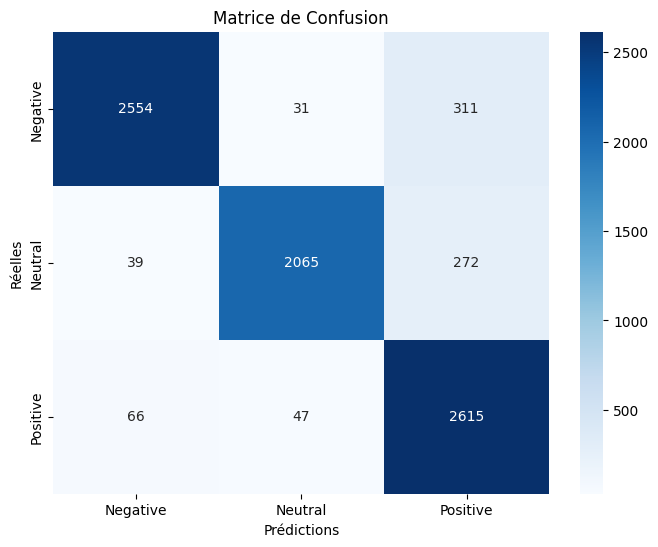

In [21]:
# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test_sample, y_pred_knn)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


## svm

In [22]:
from sklearn.svm import SVC

In [23]:
#Entrainer le modèle svm
svm = SVC()
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train_sample)
y_pred_svm = svm_model.predict(X_test_tfidf)


In [24]:
svm_model = SVC(kernel='linear', random_state=42)


In [25]:
print(X_train_tfidf.getnnz(), len(y_train_sample))


309775 32000


In [26]:
accuracy_svm = accuracy_score(y_test_sample, y_pred_svm)
classification_report_svm = classification_report(y_test_sample, y_pred_svm)

# Afficher les résultats
print(f'Accuracy: {accuracy_svm:.4f}')
print('Classification Report:\n', classification_report_svm)

Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

    Negative       0.83      0.84      0.84      2896
     Neutral       0.77      0.79      0.78      2376
    Positive       0.83      0.80      0.82      2728

    accuracy                           0.81      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.81      0.81      0.81      8000



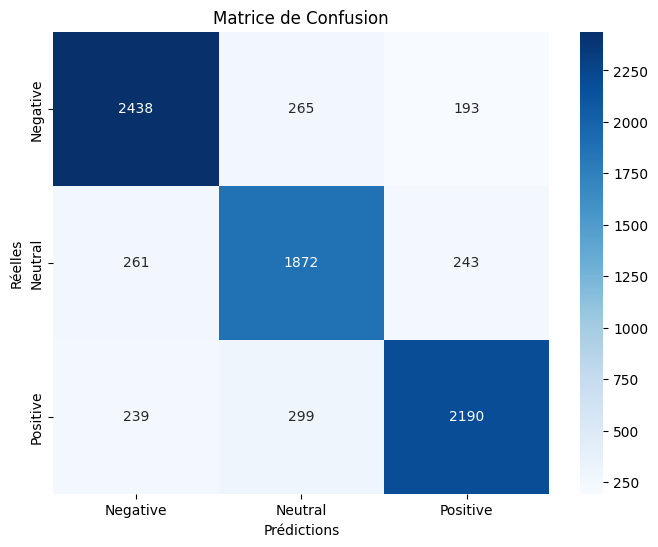

In [27]:
# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test_sample, y_pred_svm)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


## poly

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialiser le modèle SVM avec noyau polynomial
svm_poly_model = SVC(kernel='poly', degree=3, coef0=1, C=1)  # Vous pouvez ajuster les paramètres selon vos besoins

# Entraîner le modèle sur les données d'entraînement
svm_poly_model.fit(X_train_tfidf, y_train_sample)

# Prédire les labels sur les données de test
y_pred_svm_poly = svm_poly_model.predict(X_test_tfidf)

# Évaluer les performances du modèle
accuracy_poly = accuracy_score(y_test_sample, y_pred_svm_poly)
classification_report_poly = classification_report(y_test_sample, y_pred_svm_poly)

# Afficher les résultats
print(f"Accuracy (SVM Polynomial): {accuracy_poly:.4f}")
print("Classification Report (SVM Polynomial):")
print(classification_report_poly)

Accuracy (SVM Polynomial): 0.9156
Classification Report (SVM Polynomial):
              precision    recall  f1-score   support

    Negative       0.95      0.92      0.93      2896
     Neutral       0.86      0.93      0.89      2376
    Positive       0.94      0.90      0.92      2728

    accuracy                           0.92      8000
   macro avg       0.91      0.92      0.91      8000
weighted avg       0.92      0.92      0.92      8000



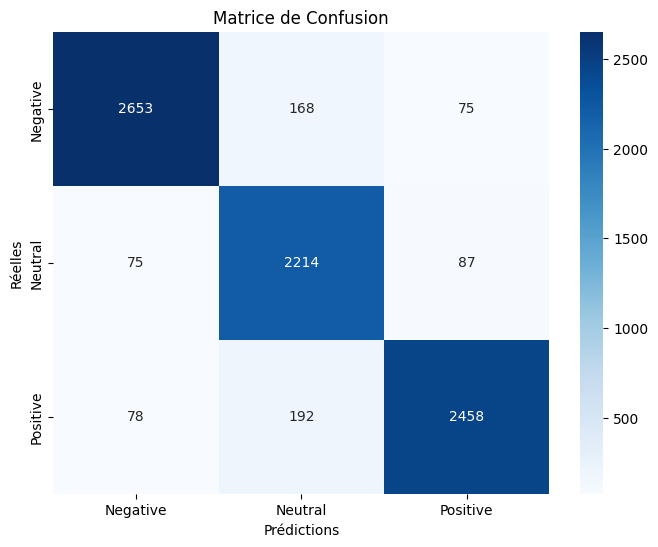

In [29]:
# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test_sample, y_pred_svm_poly)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


## LINEAR

#### Courbe ROC

In [30]:
# Ajuster le modèle SVM linéaire
svmlinear = SVC(kernel='linear')
svmlinear.fit(X_train_tfidf, y_train_sample)

# Obtenir les prédictions sur l'ensemble de test
y_pred_svc_3 = svmlinear.predict(X_test_tfidf)

# Afficher la matrice de confusion
print(confusion_matrix(y_test_sample, y_pred_svc_3))

[[2438  265  193]
 [ 261 1872  243]
 [ 239  299 2190]]


In [31]:
print(classification_report(y_pred_svc_3, y_test_sample))


              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84      2938
     Neutral       0.79      0.77      0.78      2436
    Positive       0.80      0.83      0.82      2626

    accuracy                           0.81      8000
   macro avg       0.81      0.81      0.81      8000
weighted avg       0.81      0.81      0.81      8000



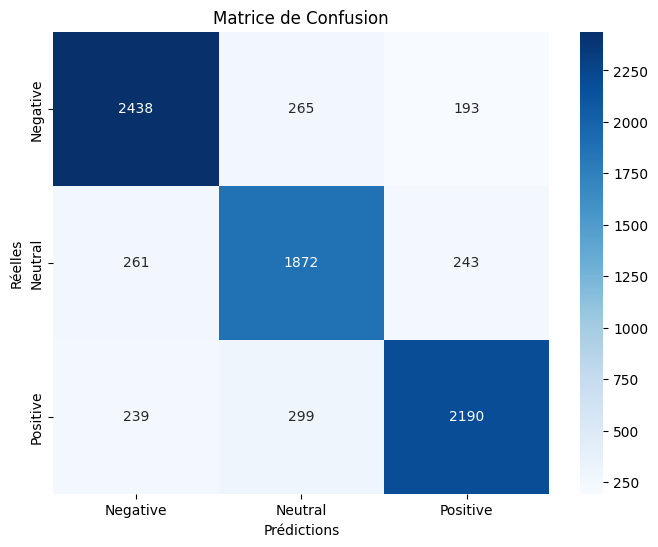

In [32]:
# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test_sample, y_pred_svc_3)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


#### Sigmoid

In [33]:
# Créer un modèle SVM avec noyau sigmoid
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(X_train_tfidf, y_train_sample)

# Faire des prédictions sur l'ensemble de test
y_pred_sigmoid = svm_sigmoid.predict(X_test_tfidf)

# Afficher le rapport de classification
print(classification_report(y_pred_sigmoid, y_test_sample))

              precision    recall  f1-score   support

    Negative       0.80      0.77      0.78      3006
     Neutral       0.69      0.70      0.70      2372
    Positive       0.74      0.77      0.76      2622

    accuracy                           0.75      8000
   macro avg       0.74      0.74      0.74      8000
weighted avg       0.75      0.75      0.75      8000



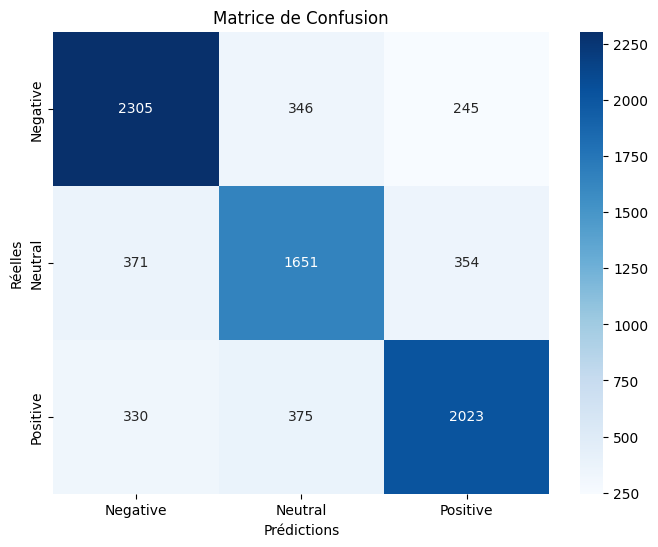

In [34]:
# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test_sample, y_pred_sigmoid)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


## Decision tree


In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Créer un modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
decision_tree.fit(X_train_tfidf, y_train_sample)

# Faire des prédictions sur l'ensemble de test
y_pred_decision_tree = decision_tree.predict(X_test_tfidf)

# Afficher le rapport de classification
print(classification_report(y_pred_decision_tree, y_test_sample),)


              precision    recall  f1-score   support

    Negative       0.79      0.83      0.81      2755
     Neutral       0.80      0.72      0.76      2632
    Positive       0.77      0.81      0.79      2613

    accuracy                           0.79      8000
   macro avg       0.79      0.79      0.78      8000
weighted avg       0.79      0.79      0.79      8000



In [37]:
pip install graphviz


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


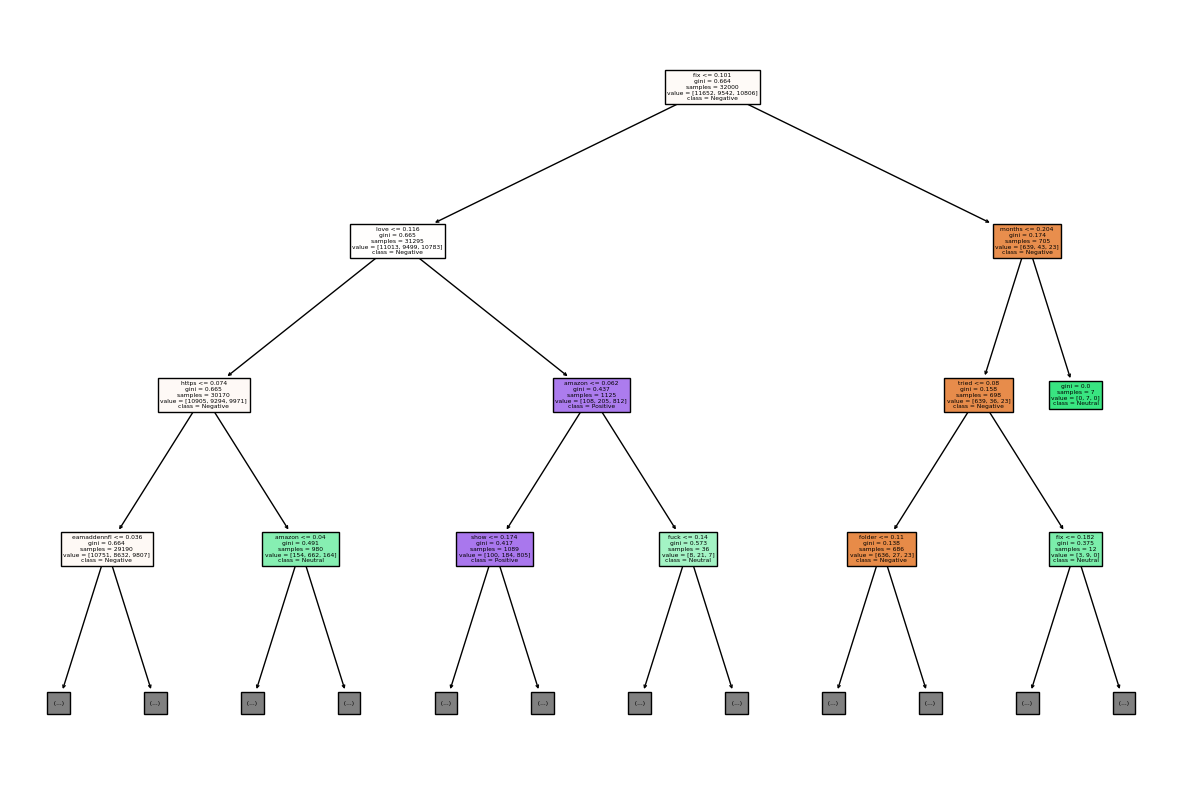

In [117]:
from sklearn import tree
import matplotlib.pyplot as plt

# Remplacez "decision_tree" par votre propre modèle d'arbre de décision
# decision_tree = ...

# Créez une nouvelle figure avec une taille plus grande
plt.figure(figsize=(15, 10))

# Affichez l'arbre de décision avec remplissage des nœuds, en limitant la profondeur pour plus de clarté
tree.plot_tree(decision_tree, filled=True, feature_names=tfidf_vectorizer.get_feature_names_out(), class_names=[ 'Negative', 'Neutral', 'Positive'],max_depth=3)

# Affichez la figure
plt.show()


La racine représente la décision la plus importante à prendre. Dans ce cas, la décision est de savoir si la valeur de la variable "fix" est inférieure ou égale à 0,101.
Les branches représentent les différentes décisions qui peuvent être prises. Dans ce cas, il y a deux branches possibles : la branche de gauche représente la décision de dire "oui" et la branche de droite représente la décision de dire "non".
Les feuilles représentent les résultats possibles. Dans ce cas, il y a trois résultats possibles : "Negative", "Neutral" et "Positive".
Les valeurs des étiquettes représentent la probabilité de chaque résultat possible. Dans ce cas, la probabilité que le résultat soit "Negative" est de 0,664 si la valeur de la variable "fix" est inférieure ou égale à 0,101

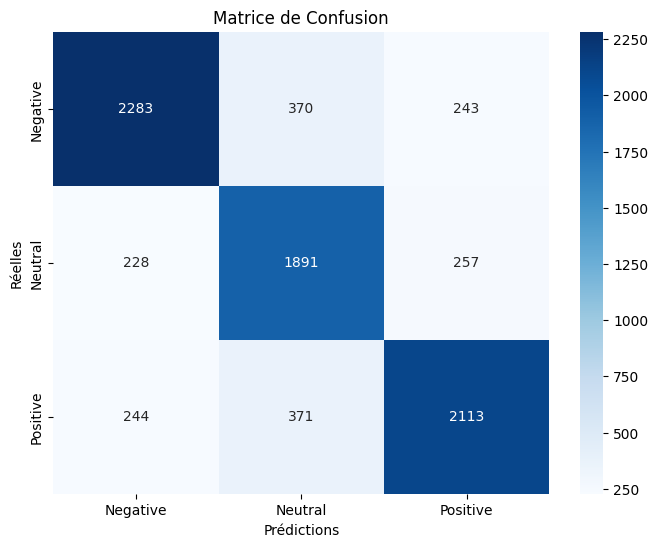

In [39]:
# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test_sample, y_pred_decision_tree)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


# Comprehension 
Décision : Choix entre options.

Arbre de décision : Modèle ML utilisant des règles pour décider.

Noeud : Point de décision dans un arbre

Branche : Chemin partant d'un nœud.

Feuille : Nœud sans branches, représentant un résultat.

Entropie : Mesure de désorganisation dans les données

Gain d'information : Mesure de l'information fournie par un nœud.

Gini : Indice mesurant l'inégalité dans les données.

Splitting : Processus de création de nouveaux nœuds.

Pruning : Processus de suppression de nœuds inefficaces.

In [40]:
#Affichage avec la bibliothèque graphique intégrée à Notebook
from sklearn.metrics import roc_curve, auc


Shapes mismatch for Your Model: (8000, 3) vs (12339, 3)


C:\Users\friti\AppData\Local\Temp\ipykernel_16660\3965687384.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', color='black')
C:\Users\friti\AppData\Local\Temp\ipykernel_16660\3965687384.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', color='black')


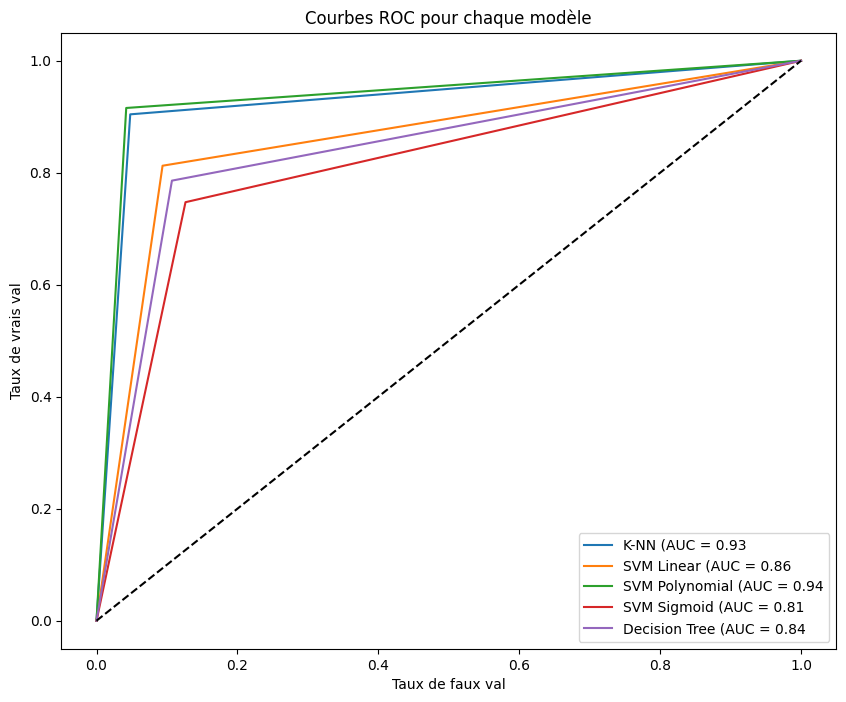

Le meilleur modèle est SVM Polynomial avec une AUC-ROC de 0.94


In [41]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Liste des prédictions pour chaque modèle
all_predictions = [y_pred_knn, y_pred_svm, y_pred_svm_poly, y_pred_sigmoid, y_pred_decision_tree, y_pred]

# Liste des noms de modèles correspondants
model_names = ['K-NN', 'SVM Linear', 'SVM Polynomial', 'SVM Sigmoid', 'Decision Tree', 'Your Model']

# Binariser les étiquettes de classe
y_test_bin = label_binarize(y_test_sample, classes=[ 'Negative', 'Neutral', 'Positive'])

# Initialiser une figure
plt.figure(figsize=(10, 8))

best_model_name = None
best_auc = 0

# Pour chaque modèle
for i, y_pred in enumerate(all_predictions):
    
    # Binariser les prédictions
    y_pred_bin = label_binarize(y_pred, classes=['Negative', 'Neutral', 'Positive'])

    # Vérifier si les formes correspondent
    if y_test_bin.shape != y_pred_bin.shape:
        # Gérer la disparité (par exemple, en rééchantillonnant ou en sélectionnant un sous-ensemble)
        print(f"Shapes mismatch for {model_names[i]}: {y_test_bin.shape} vs {y_pred_bin.shape}")
        continue

    # Calculer l'AUC-ROC
    auc_roc = roc_auc_score(y_test_bin, y_pred_bin, average='micro')

    # Tracer la courbe ROC micro-moyenne
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc_roc:.2f}')

    # Mettre à jour le meilleur modèle
    if auc_roc > best_auc:
        best_auc = auc_roc
        best_model_name = model_names[i]

# Tracer la diagonale
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', color='black')

# Ajouter des légendes et des titres
plt.xlabel('Taux de faux val')
plt.ylabel('Taux de vrais val')
plt.title('Courbes ROC pour chaque modèle')
plt.legend()
plt.show()

# Afficher le meilleur modèle
print(f"Le meilleur modèle est {best_model_name} avec une AUC-ROC de {best_auc:.2f}")


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume you have your features (X) and labels (y) ready
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train_tfidf, y_train_sample)

# Make predictions on the test set
y_forest = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test_sample,y_forest)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8776


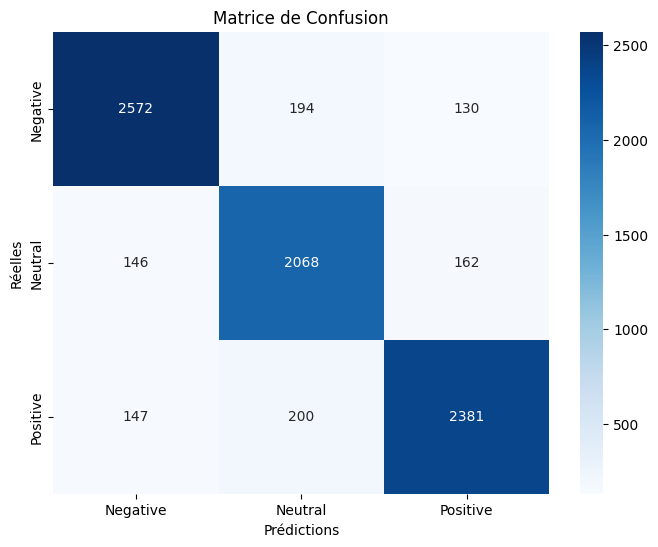

In [79]:
# Supposons que y_test et y_pred sont vos véritables valeurs et les prédictions du modèle, respectivement
conf_matrix = confusion_matrix(y_test_sample, y_forest)

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=[ 'Negative', 'Neutral', 'Positive'], 
            yticklabels=[ 'Negative', 'Neutral', 'Positive'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Réelles')
plt.show()


C:\Users\friti\AppData\Local\Temp\ipykernel_16660\2515808735.py:45: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', color='black')
C:\Users\friti\AppData\Local\Temp\ipykernel_16660\2515808735.py:45: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle='--', color='black')


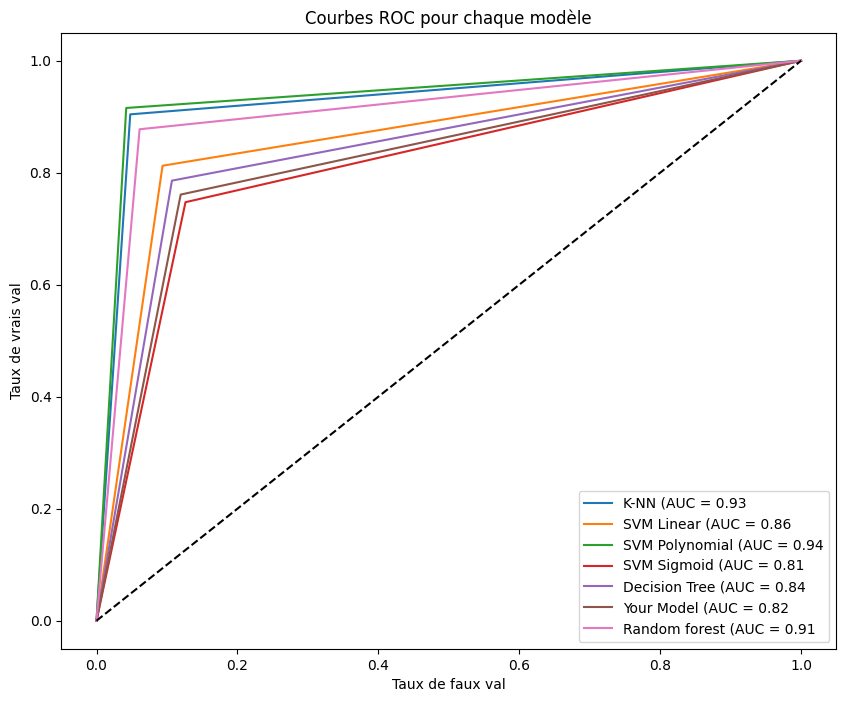

Le meilleur modèle est SVM Polynomial avec une AUC-ROC de 0.94


In [69]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Liste des prédictions pour chaque modèle
all_predictions = [y_pred_knn, y_pred_svm, y_pred_svm_poly, y_pred_sigmoid, y_pred_decision_tree, y_pred,y_forest]

# Liste des noms de modèles correspondants
model_names = ['K-NN', 'SVM Linear', 'SVM Polynomial', 'SVM Sigmoid', 'Decision Tree', 'Your Model','Random forest']

# Binariser les étiquettes de classe
y_test_bin = label_binarize(y_test_sample, classes=[ 'Negative', 'Neutral', 'Positive'])

# Initialiser une figure
plt.figure(figsize=(10, 8))

best_model_name = None
best_auc = 0

# Pour chaque modèle
for i, y_pred in enumerate(all_predictions):
    
    # Binariser les prédictions
    y_pred_bin = label_binarize(y_pred, classes=['Negative', 'Neutral', 'Positive'])

    # Vérifier si les formes correspondent
    if y_test_bin.shape != y_pred_bin.shape:
        # Gérer la disparité (par exemple, en rééchantillonnant ou en sélectionnant un sous-ensemble)
        print(f"Shapes mismatch for {model_names[i]}: {y_test_bin.shape} vs {y_pred_bin.shape}")
        continue

    # Calculer l'AUC-ROC
    auc_roc = roc_auc_score(y_test_bin, y_pred_bin, average='micro')

    # Tracer la courbe ROC micro-moyenne
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc_roc:.2f}')

    # Mettre à jour le meilleur modèle
    if auc_roc > best_auc:
        best_auc = auc_roc
        best_model_name = model_names[i]

# Tracer la diagonale
plt.plot([0, 1], [0, 1], 'k--', linestyle='--', color='black')

# Ajouter des légendes et des titres
plt.xlabel('Taux de faux val')
plt.ylabel('Taux de vrais val')
plt.title('Courbes ROC pour chaque modèle')
plt.legend()
plt.show()

# Afficher le meilleur modèle
print(f"Le meilleur modèle est {best_model_name} avec une AUC-ROC de {best_auc:.2f}")

## interpretation


L'analyse des courbes ROC indique que les modèles K-NN, SVM linéaire, SVM polynomial,Random Forest et SVM sigmoïde surpassent un modèle aléatoire dans la capacité à classer les données. Le modèle SVM Polynomial semble être le plus précis, suivi de près par les modèles ,Knn,SVM linéaire, Random forest et sigmoïde, tous affichant des performances élevées au-dessus de la ligne diagonale idéale.

En revanche, la courbe ROC du modèle d'arbre de décision est légèrement inférieure, suggérant une précision légèrement moindre par rapport aux autres modèles. Votre modèle, bien que légèrement moins précis que certains autres, reste au-dessus de la ligne de référence aléatoire.

En détaillant chaque modèle, le K-NN repose sur la proximité des données pour la classification, adapté aux tâches non structurées. Les SVM linéaire, polynomial et sigmoïde utilisent des hyperplans pour séparer les données, avec des applications respectives pour des tâches structurées, non structurées et binaires.

L'arbre de décision, bien qu'étant un modèle simple à comprendre, montre une performance légèrement inférieure, ce qui peut être attribué à sa nature de règles basées sur les données d'apprentissage. Votre modèle, bien que légèrement moins précis, reste compétent par rapport à un modèle aléatoire.

En résumé, l'image suggère que les modèles basés sur la proximité des données ou utilisant des hyperplans sont plus performantS.

In [129]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

# Exemple de phrase à tester
new_sentence = " Coca-cola is good  "

# Fonction de prétraitement des textes
def preprocess_text(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Appliquer le prétraitement à la nouvelle phrase
processed_sentence = preprocess_text(new_sentence)

# Assurez-vous que le vecteur TF-IDF est ajusté avec les données d'entraînement
X_new_tfidf = tfidf_vectorizer.transform([processed_sentence])  # Utilisez le même vecteur TF-IDF que pour les données d'entraînement

# Prédire le sentiment
predicted_sentiment = svm_poly_model.predict(X_new_tfidf)

# Afficher le résultat
print(f"Phrase: {new_sentence}")
print(f"Sentiment prédit: {predicted_sentiment[0]}")


Phrase:  Coca-cola is good  
Sentiment prédit: Positive
